# Audio files to spectrograms transformation


In [1]:
import pandas as pd
import numpy as np
import scipy
import numpy

from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import random
import librosa
import matplotlib.image

### Loading data

In [2]:


# vl - validation list from kaggle, used to load seach audio file (in our case it will be a training data)
valid_list = list(pd.read_csv("validation_list.txt", header = None).iloc[:,0])
# tl - testing list from kaggle, used to load seach audio file
test_list = list(pd.read_csv("testing_list.txt",header = None).iloc[:,0])
# tl - testing list from kaggle, used to load seach audio file
train_list = list(pd.read_csv("training_list.txt",header = None).iloc[:,0])

In [3]:
train_list[0:4]

['yes/004ae714_nohash_0.wav',
 'yes/004ae714_nohash_1.wav',
 'yes/00f0204f_nohash_0.wav',
 'yes/00f0204f_nohash_1.wav']

### Spectrograms

In [4]:
# creation of necessary directories to save spectrograms
!mkdir spectrograms
!mkdir spectrograms\yes
!mkdir spectrograms\no
!mkdir spectrograms\up
!mkdir spectrograms\down
!mkdir spectrograms\left
!mkdir spectrograms\right
!mkdir spectrograms\on
!mkdir spectrograms\off
!mkdir spectrograms\stop
!mkdir spectrograms\go

A subdirectory or file spectrograms already exists.
A subdirectory or file spectrograms\yes already exists.
A subdirectory or file spectrograms\no already exists.
A subdirectory or file spectrograms\up already exists.
A subdirectory or file spectrograms\down already exists.
A subdirectory or file spectrograms\left already exists.
A subdirectory or file spectrograms\right already exists.
A subdirectory or file spectrograms\on already exists.
A subdirectory or file spectrograms\off already exists.
A subdirectory or file spectrograms\stop already exists.
A subdirectory or file spectrograms\go already exists.


In [5]:
import warnings
warnings.simplefilter('ignore')

(129, 71)


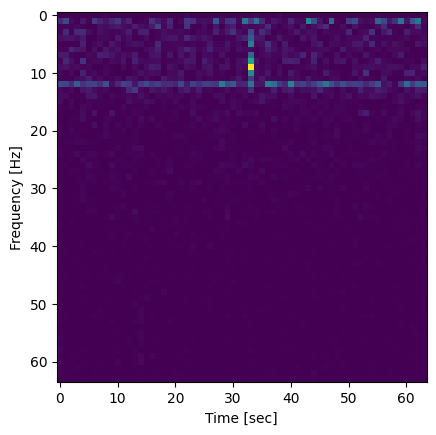

In [6]:
# exemplary spectrogram coming from an audio file
path = test_list[14]

sample_rate, samples = wavfile.read("audio/" + path)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
print(spectrogram.shape)
plt.imshow(spectrogram[0:64, 0:64])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.legend(loc="upper right")
plt.show()

### TESTING AUDIO FILES - time stretching and transformation to spectrograms 64 x 64

In [8]:
# TIME STRETCHING OF ALL AUDIO FILES TO 64 s, saving spectrorams as 64 x 64 files 
# - frequency is also reduced to significant values comprised within 64 pixels

REFERENCE_LENGTH = 14550.0 # to force the time axis of an audio file to be the same for all audio files 
# (enfording the same audio duration after time stretching)

count = 0
for path in test_list:
    
    path_ = "audio/" + path
    
    # loading audio file
    song, fs = librosa.load(path_)
    
    # stretching to Time duration equivalent to 64 pixels
    song_stretched = librosa.effects.time_stretch(song, rate=song.shape[0]/REFERENCE_LENGTH)
    frequencies, times, spectrogram = signal.spectrogram(song_stretched, fs)
    
    # spectorgram path
    arr = path_.split("/")
    spectrogram_path = "spectrograms/" + arr[1] + "/" + arr[2][:-4] + ".png"
    
    # scaling spectrograms to 64 x 64 pixels & 0 - 255 integers
    spectrogram = spectrogram[0:64, 0:64]
    spectrogram = (np.round(spectrogram/(spectrogram.max()/255.0))).astype(np.uint8)
    
    # saving spectrogram
    matplotlib.image.imsave(spectrogram_path, spectrogram)


### TRAINING AUDIO FILES - time stretching ---- and transformation to spectrograms 64 x 64

In [11]:
# TIME STRETCHING OF ALL AUDIO FILES TO 64 s, saving spectrorams as 64 x 64 files 
# - frequency is also reduced to significant values comprised within 64 pixels

REFERENCE_LENGTH = 14550.0

for path in valid_list:

    
    path_ = "audio/" + path
    
    # loading audio file
    song, fs = librosa.load(path_)
    
    # stretching to Time duration equivalent to 64 pixels
    song_stretched = librosa.effects.time_stretch(song, rate=song.shape[0]/REFERENCE_LENGTH)
    frequencies, times, spectrogram = signal.spectrogram(song_stretched, fs)
    
    # spectorgram path
    arr = path_.split("/")
    spectrogram_path = "spectrograms/" + arr[1] + "/" + arr[2][:-4] + ".png"

    # scaling spectrograms to 64 x 64 pixels & 0 - 255 integers
    spectrogram = spectrogram[0:64, 0:64]
    spectrogram = (np.round(spectrogram/(spectrogram.max()/255.0))).astype(np.uint8)
    
    # saving spectrogram
    matplotlib.image.imsave(spectrogram_path, spectrogram)


In [12]:
# TIME STRETCHING OF ALL AUDIO FILES TO 64 s, saving spectrorams as 64 x 64 files 
# - frequency is also reduced to significant values comprised within 64 pixels

REFERENCE_LENGTH = 14550.0

for path in train_list:

    
    path_ = "audio/" + path
    
    # loading audio file
    song, fs = librosa.load(path_)
    
    # stretching to Time duration equivalent to 64 pixels
    song_stretched = librosa.effects.time_stretch(song, rate=song.shape[0]/REFERENCE_LENGTH)
    frequencies, times, spectrogram = signal.spectrogram(song_stretched, fs)
    
    # spectorgram path
    arr = path_.split("/")
    spectrogram_path = "spectrograms/" + arr[1] + "/" + arr[2][:-4] + ".png"

    # scaling spectrograms to 64 x 64 pixels & 0 - 255 integers
    spectrogram = spectrogram[0:64, 0:64]
    spectrogram = (np.round(spectrogram/(spectrogram.max()/255.0))).astype(np.uint8)
    
    # saving spectrogram
    matplotlib.image.imsave(spectrogram_path, spectrogram)


### Saving lists to read spectrograms

In [13]:
spectr_test_list = []

for el in test_list:
    el_ = "audio/" + el
    arr = el_.split("/")
    spectrogram_path = "spectrograms/" + arr[1] + "/" + arr[2][:-4] + ".png"
    spectr_test_list.append(spectrogram_path)

spectr_train_list = []

for el in train_list:
    el_ = "audio/" + el
    arr = el_.split("/")
    spectrogram_path = "spectrograms/" + arr[1] + "/" + arr[2][:-4] + ".png"
    spectr_train_list.append(spectrogram_path)
    
spectr_valid_list = []

for el in valid_list:
    el_ = "audio/" + el
    arr = el_.split("/")
    spectrogram_path = "spectrograms/" + arr[1] + "/" + arr[2][:-4] + ".png"
    spectr_valid_list.append(spectrogram_path)


In [14]:
spectr_train_list[0:5]

['spectrograms/yes/004ae714_nohash_0.png',
 'spectrograms/yes/004ae714_nohash_1.png',
 'spectrograms/yes/00f0204f_nohash_0.png',
 'spectrograms/yes/00f0204f_nohash_1.png',
 'spectrograms/yes/00f0204f_nohash_2.png']

In [15]:

pd.DataFrame(spectr_train_list).to_csv("spectr_train_list.txt")
pd.DataFrame(spectr_test_list).to_csv("spectr_test_list.txt")
pd.DataFrame(spectr_valid_list).to_csv("spectr_valid_list.txt")

In [16]:
# saving the lists to spectrograms, used later during respective models' training and evaluation
spectr_train_list = pd.read_csv("spectr_train_list.txt", index_col = 0).iloc[:,0].values.tolist()
spectr_test_list = pd.read_csv("spectr_test_list.txt", index_col = 0).iloc[:,0].values.tolist()
spectr_valid_list = pd.read_csv("spectr_valid_list.txt", index_col = 0).iloc[:,0].values.tolist()

In [17]:
print(spectr_train_list[0:5])
print(spectr_test_list[0:5])
print(spectr_valid_list[0:5])

['spectrograms/yes/004ae714_nohash_0.png', 'spectrograms/yes/004ae714_nohash_1.png', 'spectrograms/yes/00f0204f_nohash_0.png', 'spectrograms/yes/00f0204f_nohash_1.png', 'spectrograms/yes/00f0204f_nohash_2.png']
['spectrograms/down/022cd682_nohash_0.png', 'spectrograms/down/096456f9_nohash_0.png', 'spectrograms/down/0c40e715_nohash_0.png', 'spectrograms/down/0ea0e2f4_nohash_0.png', 'spectrograms/down/0f250098_nohash_0.png']
['spectrograms/down/099d52ad_nohash_0.png', 'spectrograms/down/099d52ad_nohash_1.png', 'spectrograms/down/099d52ad_nohash_2.png', 'spectrograms/down/099d52ad_nohash_3.png', 'spectrograms/down/099d52ad_nohash_4.png']
